# LSTM Train - Kaza - PCA

In [1]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [2]:
DATASET_PATH = config.DATA_KAZA
jsonl_file = DATASET_PATH / "data.jsonl"
if jsonl_file.exists():
    df = pd.read_json(jsonl_file, lines=True)
    if "traffic_sequence" in df.columns:
        df = pd.DataFrame(df["traffic_sequence"].tolist())
else:
    df = pd.read_parquet(DATASET_PATH / "data.parquet")
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/10  Train Loss: 57875.6984  Val Loss: 57566.6113  Val MSE: 8913.2809  Val R2: 0.6218
Epoch 2/10  Train Loss: 57865.6350  Val Loss: 57564.8164  Val MSE: 8913.0065  Val R2: 0.6218
Epoch 3/10  Train Loss: 57871.9885  Val Loss: 57563.8047  Val MSE: 8912.8366  Val R2: 0.6218
Epoch 4/10  Train Loss: 57848.3381  Val Loss: 57562.9147  Val MSE: 8912.7102  Val R2: 0.6218
Epoch 5/10  Train Loss: 57862.3813  Val Loss: 57561.1315  Val MSE: 8912.4433  Val R2: 0.6218
Epoch 6/10  Train Loss: 57884.2427  Val Loss: 57559.5065  Val MSE: 8912.1692  Val R2: 0.6218
Epoch 7/10  Train Loss: 57866.7965  Val Loss: 57559.1074  Val MSE: 8912.1422  Val R2: 0.6218
Epoch 8/10  Train Loss: 57865.8645  Val Loss: 57555.3444  Val MSE: 8911.5275  Val R2: 0.6219
Epoch 9/10  Train Loss: 57831.2889  Val Loss: 57553.2637  Val MSE: 8911.1785  Val R2: 0.6219
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm_kaza_pca.pt (val_loss improved)
Epoch 10/10  Train Loss: 57843.1269  Val Loss: 57550.9049  Val 

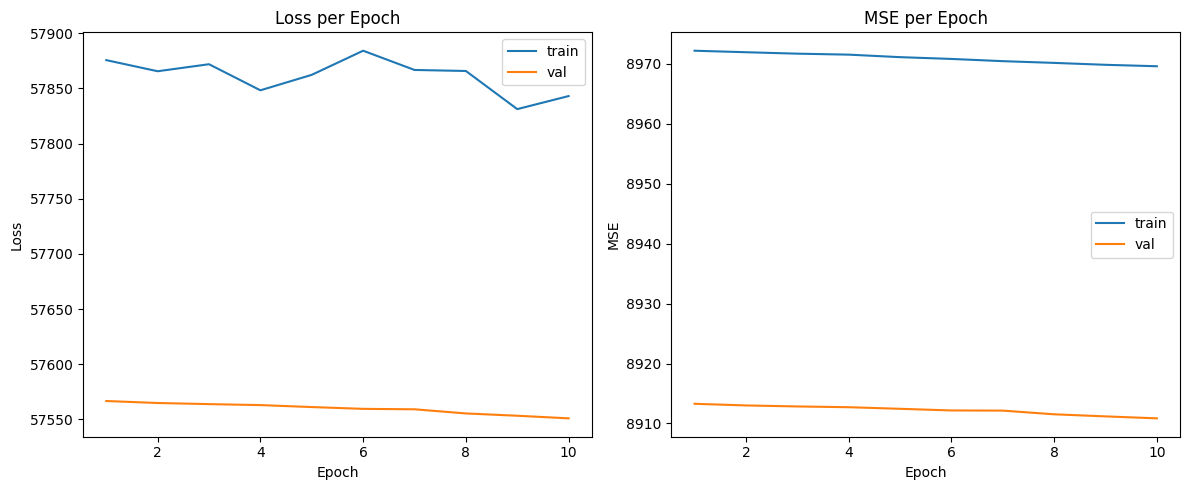

== Final Metrics ==
mse: 8910.853130602623
mae: 41.48308819428604
r2: 0.6218908533542307


In [3]:
PCA_COMPONENTS = 40
dataset = TrafficDataset(data_array, X_STEP, Y_STEP, pca_components=PCA_COMPONENTS)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=10000, shuffle=True, num_workers=8)
val_loader = DataLoader(val_ds, batch_size=10000, num_workers=8)
predictor = TrafficPredictor('lstm', dataset.sensors, X_STEP, Y_STEP, pca_model=dataset.pca if True else None)
predictor.train(train_loader, val_loader, epochs=10, save_path=config.PROJECT_ROOT.joinpath('models/lstm_kaza_pca.pt'), save_optimizer=True)
predictor.show()